In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats
from statsmodels import stats
from statsmodels.stats.anova import AnovaRM

In [45]:
ff_path = 'data-unzipped-worldbank/EG.ELC.FOSL.ZS/API_EG.ELC.FOSL.ZS_DS2_en_csv_v2_261597.csv'
fossil_fuel_df = pd.read_csv(ff_path,
                            header=0,
                            skiprows=4)
fossil_fuel_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.042577,29.092196,39.200516,41.979065,46.824895,46.825072,NaN,NaN,NaN,NaN
3,Albania,ALB,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013214,1.407779,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,Andorra,AND,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ff_meta_path = 'data-unzipped-worldbank/EG.ELC.FOSL.ZS/Metadata_Country_API_EG.ELC.FOSL.ZS_DS2_en_csv_v2_261597.csv'
fossil_fuel_meta_df = pd.read_csv(ff_meta_path,
                                  header=0)
fossil_fuel_meta_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [47]:
fossil_fuel_df = fossil_fuel_df.merge(right=fossil_fuel_meta_df[['Country Code', 'Region', 'IncomeGroup']],
                                      how='inner',
                                      on='Country Code')

In [48]:
fossil_fuel_df = fossil_fuel_df[['Country Name', 'Country Code', 'Region', 'IncomeGroup', '1996', '1997',
                                 '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
                                 '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

In [50]:
fossil_fuel_df.dropna(how='any', inplace=True)

In [51]:
fossil_fuel_df.reset_index(inplace=True, drop=True)

In [52]:
fossil_fuel_df.rename(columns={'Country Name': 'country_name',
                               'Country Code': 'country_code',
                               'Region': 'region',
                               'IncomeGroup': 'income_group'},
                      inplace=True)

In [53]:
fossil_fuel_df.head()

,country_name,country_code,region,income_group,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Angola,AGO,Sub-Saharan Africa,Lower middle income,10.019455,23.647469,19.575114,33.033708,36.885813,37.912088,...,19.388990,22.381100,24.590953,34.656811,32.042577,29.092196,39.200516,41.979065,46.824895,46.825072
1,Albania,ALB,Europe & Central Asia,Upper middle income,4.279505,3.825555,3.679781,2.670842,3.850984,4.691689,...,1.683563,2.517483,0.000000,0.019223,0.013214,1.407779,0.000000,0.000000,0.000000,0.000000
2,United Arab Emirates,ARE,Middle East & North Africa,High income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.905858,99.741693,99.767599
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,55.896450,49.601649,53.539966,63.874632,59.893150,50.336792,...,55.675640,63.438998,67.628532,64.378809,65.689789,62.776427,66.023727,64.052546,64.257069,66.935022
4,Armenia,ARM,Europe & Central Asia,Upper middle income,37.302864,50.290264,49.507349,42.662235,45.182947,48.563969,...,24.844302,25.245846,26.169844,20.349145,22.153751,32.166891,42.297163,41.154345,42.438710,35.914861


In [54]:
fossil_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 24 columns):
country_name    136 non-null object
country_code    136 non-null object
region          136 non-null object
income_group    136 non-null object
1996            136 non-null float64
1997            136 non-null float64
1998            136 non-null float64
1999            136 non-null float64
2000            136 non-null float64
2001            136 non-null float64
2002            136 non-null float64
2003            136 non-null float64
2004            136 non-null float64
2005            136 non-null float64
2006            136 non-null float64
2007            136 non-null float64
2008            136 non-null float64
2009            136 non-null float64
2010            136 non-null float64
2011            136 non-null float64
2012            136 non-null float64
2013            136 non-null float64
2014            136 non-null float64
2015            136 non-null float64
dtypes: flo

In [55]:
fossil_fuel_df[['country_code', 'region']].groupby('region').count()

,country_code
region,
East Asia & Pacific,17
Europe & Central Asia,48
Latin America & Caribbean,22
Middle East & North Africa,19
North America,2
South Asia,5
Sub-Saharan Africa,23


In [56]:
fossil_fuel_df[['country_code', 'income_group']].groupby('income_group').count()

,country_code
income_group,
High income,50
Low income,13
Lower middle income,31
Upper middle income,42


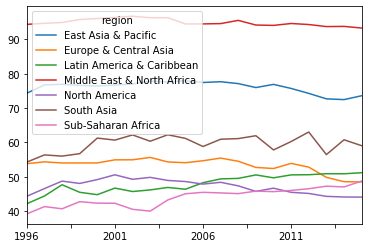

In [57]:
ff_mean_by_region = fossil_fuel_df.groupby('region').mean()
ff_mean_by_region.T.plot()

In [61]:
ff_mean_by_region

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
region,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,74.332626,76.764442,76.933702,76.620818,76.416764,76.719255,77.012504,77.852573,77.609696,77.957489,77.460681,77.682798,77.135927,75.982288,76.905353,75.724496,74.289667,72.695890,72.473394,73.601372
Europe & Central Asia,53.823788,54.347316,54.026500,54.024101,54.033992,54.934920,54.947247,55.638616,54.325391,54.094887,54.674593,55.438312,54.516180,52.719667,52.409350,53.902375,52.807330,49.835616,48.573991,48.505952
Latin America & Caribbean,42.152700,44.406016,47.680922,45.480233,44.787958,46.703405,45.702925,46.174251,46.893856,46.375723,48.278616,49.383230,49.536659,50.542222,49.693892,50.552021,50.602319,50.892773,50.877579,51.180085
Middle East & North Africa,94.389196,94.685105,94.926782,95.788380,96.080950,96.405090,96.751036,96.320863,96.331102,94.502728,94.519036,94.607698,95.547121,94.186963,94.088752,94.636856,94.336874,93.740634,93.793299,93.318853
North America,44.325945,46.561012,48.742678,48.057950,49.183620,50.576507,49.264277,49.830603,48.931246,48.615925,47.869468,48.394060,47.355840,45.746186,46.678885,45.480895,45.143725,44.296995,44.112539,44.072941
South Asia,54.273899,56.369816,56.020543,56.734729,61.268806,60.682341,62.187821,60.352185,62.236583,61.181453,58.817721,60.933169,61.122490,61.955993,57.819884,60.268164,63.036777,56.456912,60.774599,59.055425
Sub-Saharan Africa,39.185973,41.320949,40.676831,42.749735,42.322566,42.292749,40.526896,39.991969,43.252229,45.054318,45.472857,45.300309,45.096192,45.830564,45.673041,46.026564,46.518715,47.264386,47.043153,48.750307


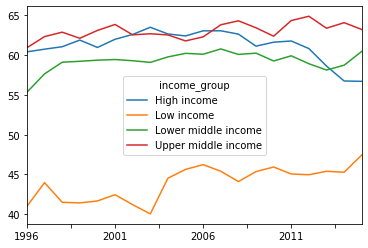

In [58]:
ff_mean_by_income = fossil_fuel_df.groupby('income_group').mean()
ff_mean_by_income.T.plot()

In [161]:
sampled_years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
# '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
#                  '2006', '2007', '2008', '2009', '2010',  

In [162]:
import math
# fossil_fuel_df['2015_use_bracket'] = fossil_fuel_df['2015'].apply(lambda x: math.floor(x/10))
fossil_fuel_df['mean_use_bracket'] = fossil_fuel_df[sampled_years].mean(axis=1)
fossil_fuel_df['mean_use_bracket'] = fossil_fuel_df['mean_use_bracket'].apply(lambda x: math.floor(x/10))

In [163]:
# reshaping the data to comply with requirements of statsmodels AnovaRM (Anova with Repeated Measures)
reshaped_ff_df = pd.melt(fossil_fuel_df,
                         id_vars=['country_name', 'country_code',
                                  'region', 'income_group', 'mean_use_bracket'],
                         value_vars=sampled_years)
# '2015_use_bracket'


In [164]:
reshaped_ff_df.iloc[130:150]

,country_name,country_code,region,income_group,mean_use_bracket,variable,value
130,"Venezuela, RB",VEN,Latin America & Caribbean,Upper middle income,3,2006,26.101683
131,Vietnam,VNM,East Asia & Pacific,Lower middle income,6,2006,66.156415
132,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,10,2006,100.000000
133,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,9,2006,94.735520
134,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,0,2006,0.134270
135,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,3,2006,32.116880
136,Angola,AGO,Sub-Saharan Africa,Lower middle income,3,2007,22.381100
137,Albania,ALB,Europe & Central Asia,Upper middle income,0,2007,2.517483
138,United Arab Emirates,ARE,Middle East & North Africa,High income,9,2007,100.000000
139,Argentina,ARG,Latin America & Caribbean,Upper middle income,6,2007,63.438998


In [165]:
ff_by_region = reshaped_ff_df.groupby(by='region')
ff_by_income = reshaped_ff_df.groupby(by='income_group')

In [166]:
for name, group in ff_by_income:
    print(name)

High income
Low income
Lower middle income
Upper middle income


In [167]:
test_region = ff_by_region.get_group('Europe & Central Asia')
test_income = ff_by_income.get_group('High income')
test_income

,country_name,country_code,region,income_group,mean_use_bracket,variable,value
2,United Arab Emirates,ARE,Middle East & North Africa,High income,9,2006,100.000000
5,Australia,AUS,East Asia & Pacific,High income,8,2006,90.700692
6,Austria,AUT,Europe & Central Asia,High income,2,2006,33.811772
8,Belgium,BEL,Europe & Central Asia,High income,3,2006,39.852753
12,Bahrain,BHR,Middle East & North Africa,High income,10,2006,100.000000
...,...,...,...,...,...,...,...
1339,Slovenia,SVN,Europe & Central Asia,High income,3,2015,32.435716
1340,Sweden,SWE,Europe & Central Asia,High income,0,2015,1.085030
1346,Trinidad and Tobago,TTO,Latin America & Caribbean,High income,9,2015,100.000000
1351,Uruguay,URY,Latin America & Caribbean,High income,2,2015,11.441048


In [168]:

anova_rm = AnovaRM(data=test_income, depvar='value', subject='country_code', within=['variable'])

results = anova_rm.fit()
print(results)

                 Anova
         F Value Num DF  Den DF  Pr > F
---------------------------------------
variable  8.0599 9.0000 441.0000 0.0000



In [169]:
ff_by_bracket = reshaped_ff_df.groupby(by='mean_use_bracket')
test_bracket = ff_by_bracket.get_group(9)
# test_bracket

In [172]:
fossil_fuel_df.loc[fossil_fuel_df['mean_use_bracket'] == 9]

,country_name,country_code,region,income_group,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2015_use_bracket,mean_use_bracket
2,United Arab Emirates,ARE,Middle East & North Africa,High income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,99.905858,99.741693,99.767599,9,9
9,Benin,BEN,Sub-Saharan Africa,Low income,100.000000,96.610169,97.468354,97.222222,97.619048,96.969697,...,98.689956,99.218750,99.130435,100.000000,100.000000,100.000000,100.000000,94.444444,9,9
10,Bangladesh,BGD,South Asia,Lower middle income,93.559352,93.936583,93.285204,94.235294,95.250777,94.290478,...,97.223683,98.878339,98.212797,98.025049,98.399984,98.053464,98.680276,98.773110,9,9
14,Belarus,BLR,Europe & Central Asia,Upper middle income,99.932569,99.919407,99.880810,99.928345,99.896556,99.880302,...,99.763182,99.585199,99.521421,99.481366,99.275951,98.981179,99.096013,98.929053,9,9
17,Brunei Darussalam,BRN,East Asia & Pacific,High income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,99.946309,99.949109,99.954566,99.955615,99.952381,9,9
18,Botswana,BWA,Sub-Saharan Africa,Upper middle income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,99.891658,99.956766,99.966296,9,9
30,Cyprus,CYP,Europe & Central Asia,High income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.704666,99.405561,98.628335,96.388720,94.551622,92.377622,92.712644,91.219943,9,9
35,Algeria,DZA,Middle East & North Africa,Upper middle income,99.346374,99.651114,99.075746,99.180030,99.787502,99.740845,...,99.296650,99.205215,99.619539,99.019991,98.916320,99.448990,99.604620,99.677316,9,9
38,Eritrea,ERI,Sub-Saharan Africa,Low income,100.000000,99.532710,99.487179,99.532710,99.523810,99.570815,...,99.303136,99.322034,99.356913,99.406528,99.442897,99.459459,99.484536,99.507389,9,9
51,"Hong Kong SAR, China",HKG,East Asia & Pacific,High income,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.997368,99.997418,99.757730,99.795438,99.765730,99.757393,99.734396,99.721273,9,9


In [171]:
for name, group in ff_by_bracket:
    anova_rm = AnovaRM(data=group, depvar='value', subject='country_code', within=['variable'])
    results = anova_rm.fit()
    print(name)
    print(group.shape[0])
    print(results)

0
160
                 Anova
         F Value Num DF  Den DF  Pr > F
---------------------------------------
variable  0.5686 9.0000 135.0000 0.8209

1
40
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  1.9711 9.0000 27.0000 0.0836

2
100
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  2.8275 9.0000 81.0000 0.0061

3
100
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0.2086 9.0000 81.0000 0.9924

4
100
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0.4412 9.0000 81.0000 0.9087

5
130
                 Anova
         F Value Num DF  Den DF  Pr > F
---------------------------------------
variable  1.9556 9.0000 108.0000 0.0516

6
100
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0